# KNN

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
plt.style.use("ggplot")

In [2]:
df=pd.read_csv("glass.csv")
df.head() 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## EDA

In [3]:
df.duplicated().sum()

1

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


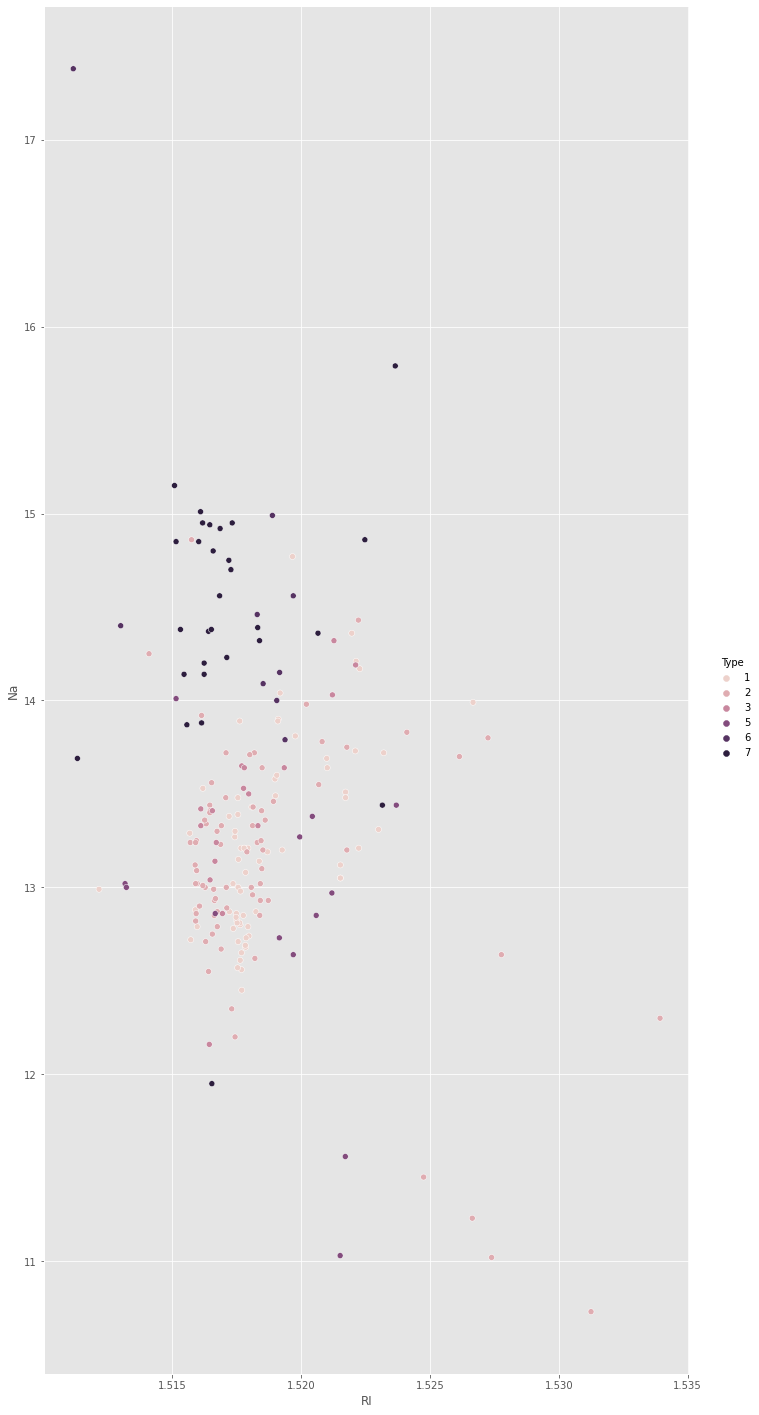

In [8]:
sns.pairplot(data=df,x_vars="RI",y_vars="Na",hue="Type",height=20,aspect=0.5);

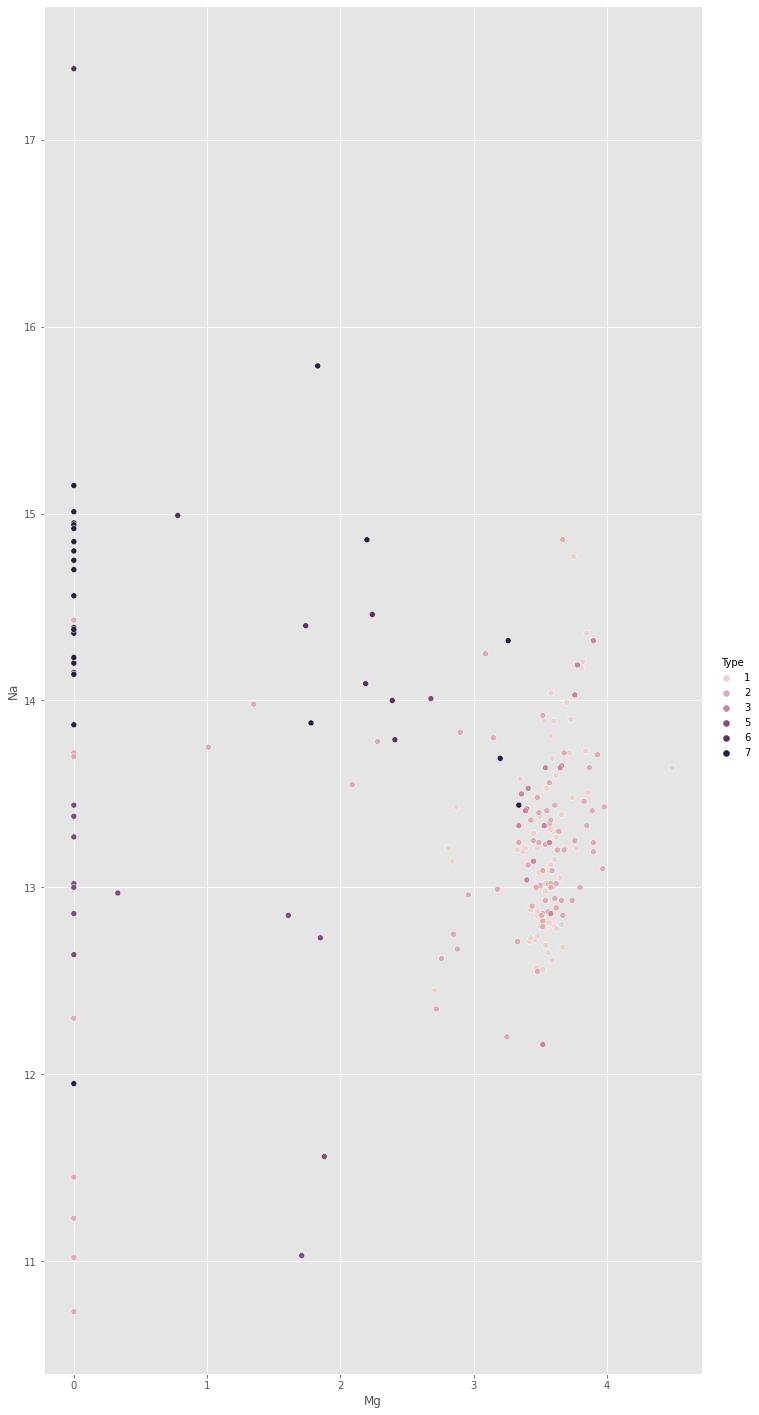

In [9]:
sns.pairplot(data=df,x_vars="Mg",y_vars="Na",hue="Type",height=20,aspect=0.5);

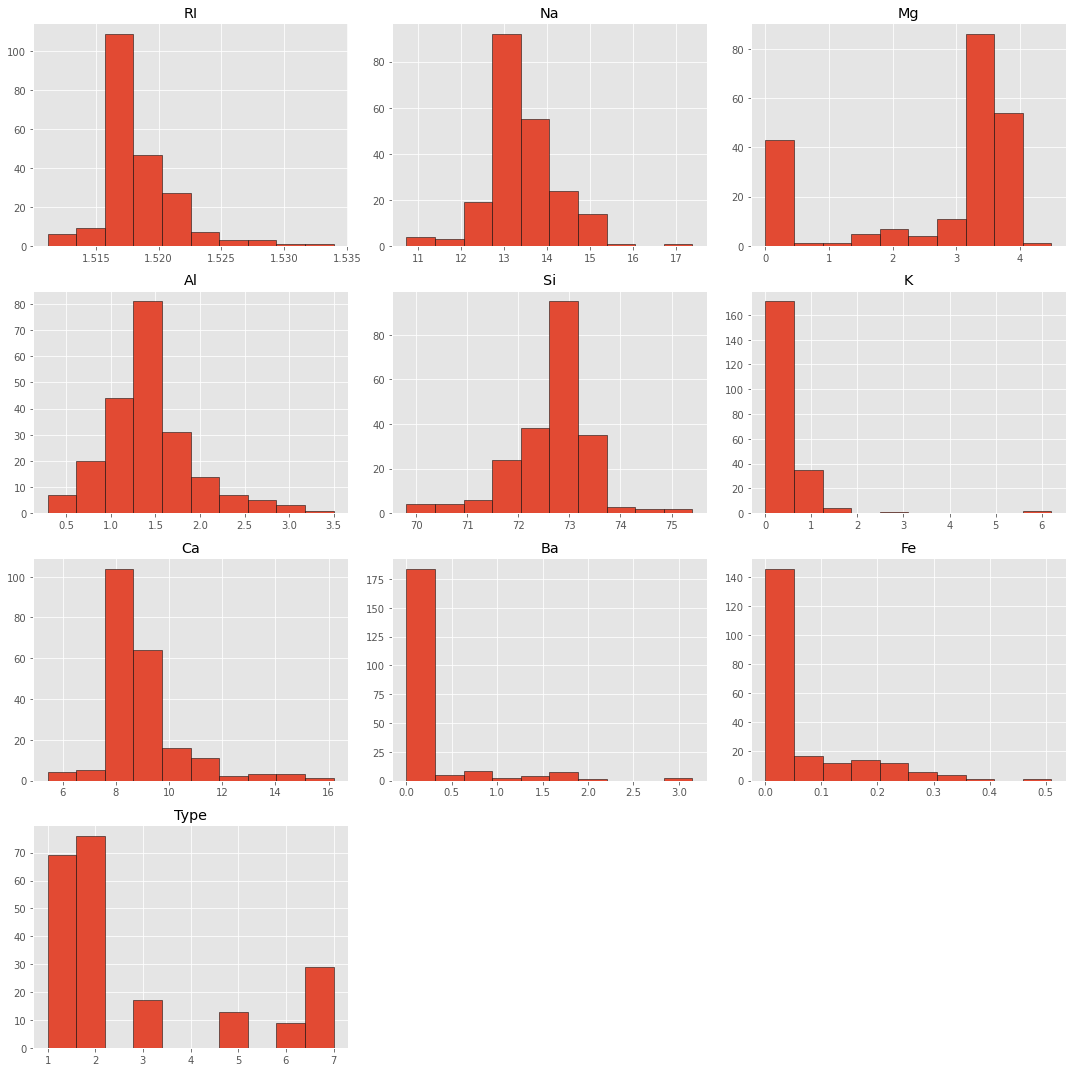

In [10]:
df.hist(edgecolor='k',figsize=(15,15))
plt.tight_layout();

In [11]:
# separate features which are independent and target

x=df.drop("Type",axis=1)
y=df["Type"]

In [12]:
# train test split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
# create a KFOLD Object with 10 splits (Cross validation to compare the performance of the model for different value of K)

from sklearn.model_selection import KFold
kfold=KFold(n_splits=10,shuffle=True,random_state=42)


## Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
x_train_scaled_df=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled_df=pd.DataFrame(x_test_scaled,columns=x_test.columns)

## HyperParameter Tuning Using GridSearchCV

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

k_range=range(1,31,2)
params={"n_neighbors":k_range}

knn=KNeighborsClassifier()
grid_search=GridSearchCV(knn,params,cv=kfold,scoring="accuracy")
grid_search.fit(x_train_scaled_df,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 31, 2)}, scoring='accuracy')

In [16]:
grid_search.best_params_

{'n_neighbors': 1}

In [17]:
from sklearn.model_selection import cross_val_score

knn_best=KNeighborsClassifier(n_neighbors=1)
scores=cross_val_score(knn_best,x_train_scaled_df,y_train,cv=kfold,scoring="accuracy")
scores
scores.mean()

0.711764705882353

## Visualizing Grid search


In [18]:
scores_cv=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x_train_scaled_df,y_train,cv=kfold,scoring="accuracy")
    scores_cv.append(scores.mean())

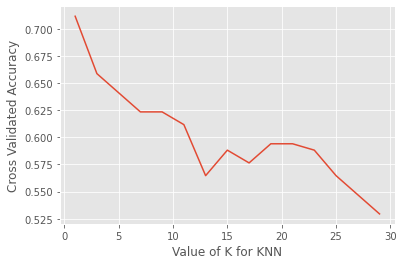

In [19]:
plt.plot(k_range,scores_cv)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross Validated Accuracy");

##  Model building and predicting as per the evaluated accuracy score and best K-neighbors  possible from the above GridSearchCV

In [20]:
knn_best=KNeighborsClassifier(n_neighbors=1)
knn_best.fit(x_train_scaled_df,y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
pred_test=knn_best.predict(x_test_scaled_df)
pred_train=knn_best.predict(x_train_scaled_df)
pred_test,pred_train

(array([3, 7, 1, 7, 2, 2, 1, 2, 2, 1, 2, 5, 1, 2, 6, 5, 7, 1, 2, 7, 1, 7,
        7, 7, 1, 5, 1, 1, 6, 1, 1, 2, 2, 2, 2, 7, 5, 1, 2, 2, 1, 2, 1],
       dtype=int64),
 array([2, 3, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 7, 2, 5, 1, 1, 2, 1, 7, 5,
        2, 1, 2, 6, 1, 1, 1, 1, 1, 2, 2, 3, 1, 2, 5, 2, 1, 3, 2, 2, 1, 2,
        2, 2, 1, 2, 1, 3, 2, 2, 2, 2, 1, 7, 1, 1, 2, 2, 1, 1, 7, 6, 1, 1,
        2, 7, 3, 1, 1, 2, 3, 2, 3, 2, 1, 1, 2, 3, 6, 1, 7, 5, 2, 5, 1, 1,
        2, 1, 2, 1, 7, 3, 2, 1, 7, 1, 2, 5, 1, 3, 1, 2, 1, 2, 7, 5, 7, 1,
        2, 1, 1, 2, 2, 2, 7, 7, 2, 1, 1, 1, 6, 2, 1, 5, 2, 7, 2, 6, 7, 1,
        1, 2, 1, 5, 7, 5, 1, 1, 2, 1, 1, 3, 7, 7, 2, 1, 3, 7, 1, 1, 3, 2,
        3, 2, 2, 2, 2, 2, 2, 7, 1, 7, 2, 2, 1, 2, 6, 2], dtype=int64))

In [22]:
from sklearn.metrics import accuracy_score

accuracy_test=accuracy_score(y_test,pred_test)
accuracy_train=accuracy_score(y_train,pred_train)
accuracy_train,accuracy_test

(1.0, 0.7209302325581395)